#### Modelagem e normalização de bancos de dados relacionais

Certo dia, um dos gestores do banco em que você trabalha como cientista de dados procurou você pedindo ajuda para projetar um pequeno banco de dados com o objetivo de mapear os clientes da companhia pelos diferentes produtos financeiros que eles contrataram.

O gestor explicou que o banco tinha uma grande quantidade de clientes e oferecia uma variedade de produtos financeiros, como cartões de crédito, empréstimos, seguros e investimentos. No entanto, eles estavam tendo dificuldades para entender quais produtos eram mais populares entre os clientes e como esses produtos estavam interagindo entre si.

Como ponto de partida, o gestor deixou claro que um cliente pode contratar vários produtos diferentes ao passo que um mesmo produto pode também estar associado a vários clientes diferentes e elaborou um rústico esboço de banco de dados com duas tabelas, da seguinte forma:

Tabela 1
	Nome da tabela: cliente Colunas: codigo_cliente, nome_cliente, sobrenome_cliente, 	telefone_cliente, municipio_cliente, codigo_tipo_cliente, tipo_cliente

Tabela 2
	Nome da tabela: produto Colunas: codigo_produto, nome_produto, descricao_produto, 	codigo_tipo_produto, tipo_produto, codigo_diretor_responsavel, nome_diretor_responsavel, 	email_diretor_responsavel

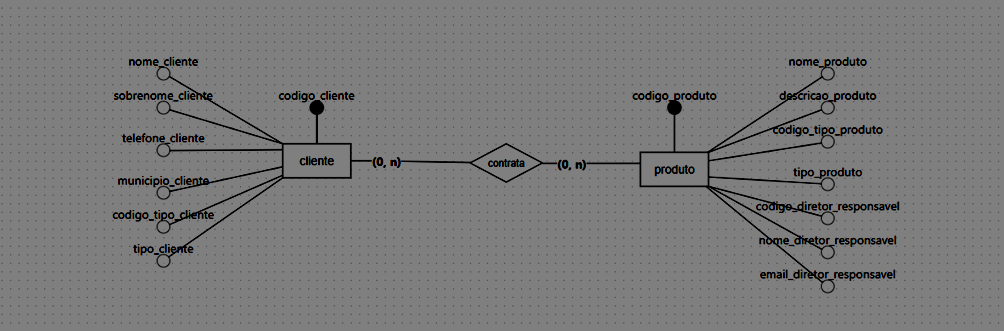

2) Agora apresente um modelo lógico que expresse as mesmas informações e relacionamentos descritos no modelo original, mas decompondo-os quando necessário para que sejam respeitadas as 3 primeiras formas normais. Destaque atributos chaves e apresente também a cardinalidade dos relacionamentos.

![WhatsApp Image 2024-09-21 at 20.57.41.jpeg](<attachment:WhatsApp Image 2024-09-21 at 20.57.41.jpeg>)
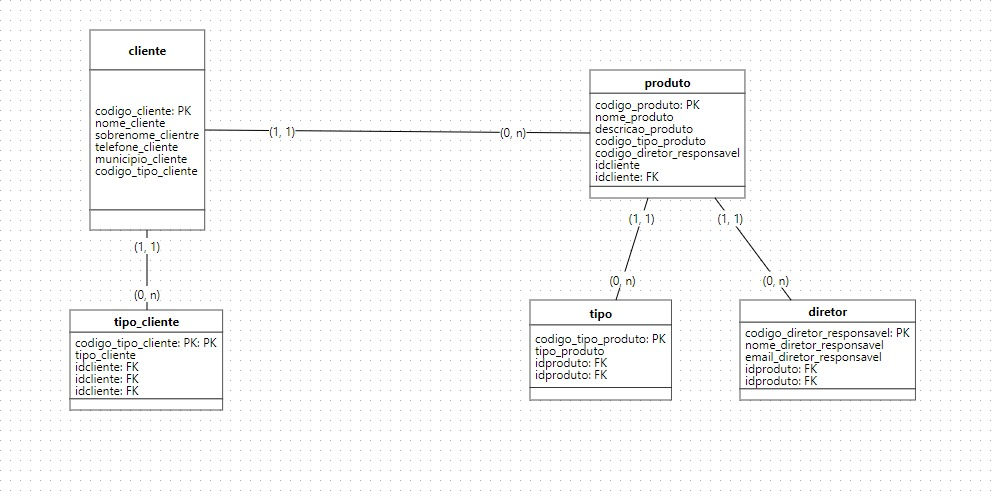

#### Consultas SQL simples e complexas em um banco de dados relacional

Um exemplo de modelo de banco de dados com relacionamento muitos-para-muitos pode ser o de um e-commerce que tem produtos e categorias, onde um produto pode pertencer a várias categorias e uma categoria pode estar associada a vários produtos. Nesse caso, teríamos duas tabelas: "produtos" e "categorias", com uma tabela intermediária "produtos_categorias" para relacionar os produtos às suas categorias.

CREATE TABLE produtos (
	id INT PRIMARY KEY AUTO_INCREMENT,
	nome VARCHAR(100) NOT NULL,
	preco DECIMAL(10, 2) NOT NULL );

CREATE TABLE categorias (
	id INT PRIMARY KEY AUTO_INCREMENT,
	nome VARCHAR(100) NOT NULL );

CREATE TABLE produtos_categorias (
	produto_id INTEGER REFERENCES produtos(id),
	categoria_id INTEGER REFERENCES categorias(id) );


Assim, usando o subconjunto da "structured query language" chamado de DQL, produza consultas de modo a atender cada uma das seguintes solicitações:

3) Liste os nomes de todos os produtos que custam mais de 100 reais, ordenando-os primeiramente pelo preço e em segundo lugar pelo nome. Use alias para mostrar o nome da coluna nome como "Produto" e da coluna preco como "Valor". A resposta da consulta não deve mostrar outras colunas de dados.

In [ ]:
SELECT nome AS Produto,
       preco AS Valor
        FROM produtos
            WHERE preco > 100
                ORDER BY preco ASC, nome ASC;

4) Liste todos os ids e preços de produtos cujo preço seja maior do que a média de todos os preços encontrados na tabela "produtos".

In [ ]:
SELECT id,
       preco
        FROM produtos
            WHERE preco > (SELECT AVG(preco) FROM produtos)

5) Para cada categoria, mostre o preço médio do conjunto de produtos a ela associados. Caso uma categoria não tenha nenhum produto a ela associada, esta categoria não deve aparecer no resultado final. A consulta deve estar ordenada pelos nomes das categorias.

In [ ]:
SELECT C.id AS id_categoria, 
       C.nome AS categoria, 
       AVG(A.preco) as preco_medio
        FROM produtos A
            INNER JOIN categorias C ON A.id = C.produto_id
            INNER JOIN produtos categorias B ON A.id = B.categoria_id
                GROUP BY C.id, C.nome
                ORDER BY C.nome

#### Inserções, alterações e remoções de objetos e dados em um banco de dados relacional

Você está participando de um processo seletivo para trabalhar como cientista de dados na Ada, uma das maiores formadoras do país em áreas correlatadas à tecnologia. Dividido em algumas etapas, o processo tem o objetivo de avaliar você nos quesitos Python, Machine Learning e Bancos de Dados. Ainda que os dois primeiros sejam o cerne da sua atuação no dia-a-dia, considera-se que Bancos de Dados também constituem um requisito importante e, por isso, esta etapa pode ser a oportunidade que você precisava para se destacar dentre os seus concorrentes, demonstrando um conhecimento mais amplo do que os demais.


6) Com o objetivo de demonstrar o seu conhecimento através de um exemplo contextualizado com o dia-a-dia da escola, utilize os comandos do subgrupo de funções DDL para construir o banco de dados simples abaixo, que representa um relacionamento do tipo 1,n entre as entidades "aluno" e "turma":

Tabela 1
Nome da tabela: aluno
Colunas da tabela: id_aluno (INT), nome_aluno (VARCHAR), aluno_alocado (BOOLEAN), id_turma (INT)

Tabela 2
Nome da tabela: turma
Colunas da tabela: id_turma (INT), código_turma (VARCHAR), nome_turma (VARCHAR)

In [ ]:
CREATE DATABASE MILENO_DATABASE 
USE MILENO_DATABASE

CREATE TABLE aluno (
	ID_ALUNO INT PRIMARY KEY,
	NOME_ALUNO VARCHAR(50) NOT NULL,
	ALUNO_ALOCADO BOOLEAN NOT NULL DEFAULT 0,
	ID_TURMA INT,
	FOREIGN KEY (ID_TURMA) REFERENCES TURMA (ID_TURMA)
);

CREATE TABLE turma (
	ID_TURMA INT PRIMARY KEY,
	CODIGO_TURMA VARCHAR (15),
	NOME_TURMA VARCHAR (30)
)

7) Agora que você demonstrou que consegue ser mais do que um simples usuário do banco de dados, mostre
separadamente cada um dos códigos DML necessários para cumprir cada uma das etapas a seguir:

a) Inserir pelo menos duas turmas diferentes na tabela de turma;

In [ ]:
USE MILENO_DATABASE
INSERT INTO turma (ID_TURMA, CODIGO_TURMA, NOME_TURMA)
VALUES (1, '2819', 'ENGENHARIA DE DADOS');
INSERT INTO turma (ID_TURMA, CODIGO_TURMA, NOME_TURMA)
VALUES (2, '2839', 'CIÊNCIA DE DADOS');

b) Inserir pelo menos 1 aluno alocado em cada uma destas turmas na tabela aluno (todos com NULL na coluna aluno_alocado)

In [ ]:
USE MILENO_DATABASE
INSERT INTO aluno (ID_ALUNO, NOME_ALUNO, ALUNO_ALOCADO, ID_TURMA)
VALUES (1, 'Yara', TRUE, 1);
INSERT INTO aluno (ID_ALUNO, NOME_ALUNO, ALUNO_ALOCADO, ID_TURMA)
VALUES (2, 'Alessandro', TRUE, 2);

c) Inserir pelo menos 2 alunos não alocados em nenhuma turma na tabela aluno (todos com NULL na
coluna aluno_alocado)

In [ ]:
USE MILENO_DATABASE
INSERT INTO aluno (ID_ALUNO, NOME_ALUNO, ID_TURMA)
VALUES (3, 'Tatiana', NULL);
INSERT INTO aluno (ID_ALUNO, NOME_ALUNO, ID_TURMA)
VALUES (4, 'Ana', NULL);

d) Atualizar a coluna aluno_alocado da tabela aluno, de modo que os alunos associados a uma disciplina recebam o valor True e alunos não associdos a nenhuma disciplina recebam o falor False para esta coluna.

In [ ]:
UPDATE aluno
SET ALUNO_ALOCADO = CASE WHEN ID_TURMA IS NOT NULL THEN TRUE ELSE FALSE END;